As worker for the auxilary car industry and with the 

In [2]:
import pandas as pd

df_sales = pd.read_csv('Car Analysis UK\\Sales_table.csv')
df_basic = pd.read_csv('Car Analysis UK\\basic_table.csv')
df_price = pd.read_csv('Car Analysis UK\\price_table.csv')

Not nulls and range of price reasonable in price data

In [14]:
print(df_price.describe())
print(df_price.info())

             Year    Entry_price
count  6333.00000    6333.000000
mean   2009.36523   29400.553134
std       6.01546   39314.089694
min    1998.00000    4499.000000
25%    2004.00000   12310.000000
50%    2010.00000   17815.000000
75%    2014.00000   27455.000000
max    2021.00000  320120.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        6333 non-null   object
 1   Genmodel     6333 non-null   object
 2   Genmodel_ID  6333 non-null   object
 3   Year         6333 non-null   int64 
 4   Entry_price  6333 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB
None


In [17]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        773 non-null    object
 1   Genmodel     773 non-null    object
 2   Genmodel_ID  773 non-null    object
 3   2020         773 non-null    int64 
 4   2019         773 non-null    int64 
 5   2018         773 non-null    int64 
 6   2017         773 non-null    int64 
 7   2016         773 non-null    int64 
 8   2015         773 non-null    int64 
 9   2014         773 non-null    int64 
 10  2013         773 non-null    int64 
 11  2012         773 non-null    int64 
 12  2011         773 non-null    int64 
 13  2010         773 non-null    int64 
 14  2009         773 non-null    int64 
 15  2008         773 non-null    int64 
 16  2007         773 non-null    int64 
 17  2006         773 non-null    int64 
 18  2005         773 non-null    int64 
 19  2004         773 non-null    

I´m not interested in luxury cars that gives high dispersion

In [116]:
print('Number of cars outside of analysis=', df_price[df_price['Entry_price']> 50000].shape)  
df_price = df_price[df_price['Entry_price']<= 50000]
df_price.describe()

Number of cars outside of analysis= (711, 5)


,Year,Entry_price
count,5621.000000,5621.000000
mean,2009.092154,18438.624266
std,6.017830,9281.130832
min,1998.000000,4499.000000
25%,2004.000000,11395.000000
50%,2009.000000,16636.000000
75%,2014.000000,23075.000000
max,2021.000000,49824.000000


We see in the next charts that prices and number of unit droped during pandemy because of lack of components, but prices sky rocketed because companies sold less car but saw the oportunity of get more margin

<class 'pandas.core.series.Series'>
Index: 24 entries, 1998 to 2021
Series name: Entry_price
Non-Null Count  Dtype
--------------  -----
24 non-null     int32
dtypes: int32(1)
memory usage: 288.0 bytes


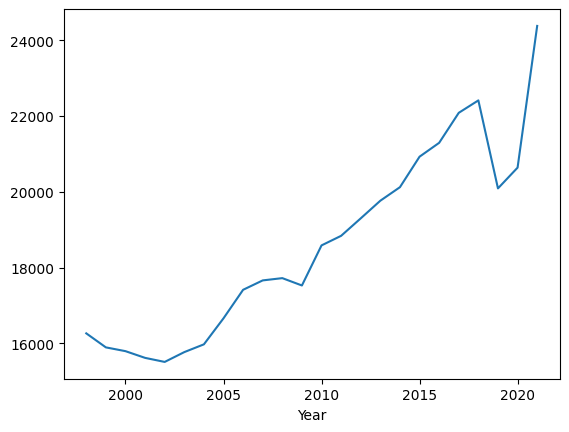

In [122]:
# Average price of cars per year
df= df_price.groupby('Year')['Entry_price'].mean().astype(int)
df.plot()

Top year of sales was 2016, after that came pandemy with a drop of almost 30% in sales

Last years of sales
 Year
2016    2476613
2017    2290444
2018    2212385
2019    2178658
2020    1530118
Name: Units, dtype: int32
Reduccion of sales= 29.0


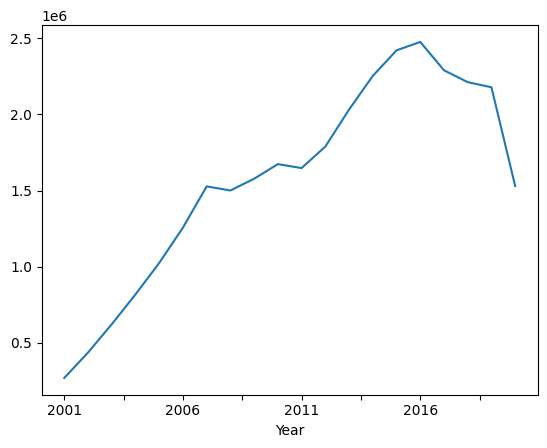

In [20]:
df_sales_melt = df_sales.melt(id_vars=["Maker", "Genmodel", "Genmodel_ID"], var_name="Year", value_name="Units")

df =df_sales_melt[['Year', 'Units']].groupby('Year')['Units'].sum().astype(int)

df.plot()
print('Last years of sales\n', df.tail(5))
print(f"Reduccion of sales=", (100 -(1530118 / 2178658 * 100)) // 1)

Let's explore the top 5 cars per unit solds

In [23]:
df_top_2020 = df_sales[['Maker', 'Genmodel', '2020', '2019', '2015']].sort_values('2020', ascending=False).head(5)

print('Top car sold in 2020 after pandemy')
df_top_2020

Top car sold in 2020 after pandemy


,Maker,Genmodel,2020,2019,2015
231,FORD,FORD FIESTA,46739,74500,125619
707,VAUXHALL,VAUXHALL CORSA,45080,50763,86840
735,VOLKSWAGEN,VOLKSWAGEN GOLF,41724,57451,70714
232,FORD,FORD FOCUS,37738,53901,76895
358,LAND ROVER,LAND ROVER RANGE ROVER,36052,48419,37174


Ford Fiesta sales plummeted in the last 5 years, in the year 2023 Ford stopped selling the model after almost 50 years
despite of being for years one of the cars with more unit sold, other models didn't fall so much

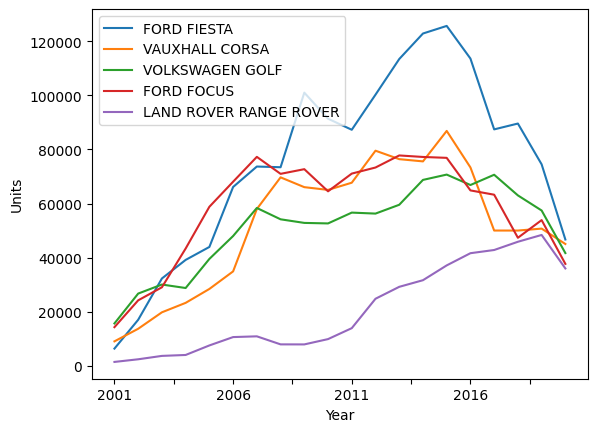

In [24]:
import matplotlib.pyplot as plt

axes= plt.axes()
for i in range(0, len(df_top_2020)):
    df = df_sales_melt[df_sales_melt['Genmodel'] == df_top_2020.iloc[i,1]].sort_values('Year', ascending=True)
    axes= df.plot(ax=axes,  xlabel='Year', ylabel='Units', x='Year')
plt.legend(df_top_2020.iloc[:,1])

From 2015 to 2020 Ford and Vauxhall had a similar lost in, almost reduce to half of units sold and Volkswagen and Land Rover resisted better

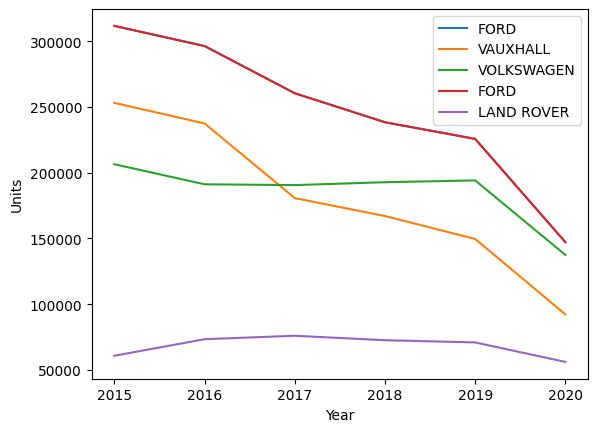

In [25]:
df=df_sales_melt[df_sales_melt['Year']>= '2015'].groupby(['Maker', 'Year'], as_index=False)['Units'].sum()

axes1= plt.axes()
for i in range(0, len(df_top_2020)):
    axes= df[df['Maker'] == df_top_2020.iloc[i,0]].plot(ax=axes1,  xlabel='Year', ylabel='Units', x='Year')

plt.legend(df_top_2020.iloc[:,0])

Ford's peak was in 2015, what happened to the best-selling cars? With the lack of components such as chips, were they diverted to more expensive cars?. I doesn´t seem so, although ford focus resist better.

        Genmodel   Units
48   FORD FIESTA  125619
54    FORD FOCUS   76895
108    FORD KUGA   31140
120  FORD MONDEO   17937
96       FORD KA   13122


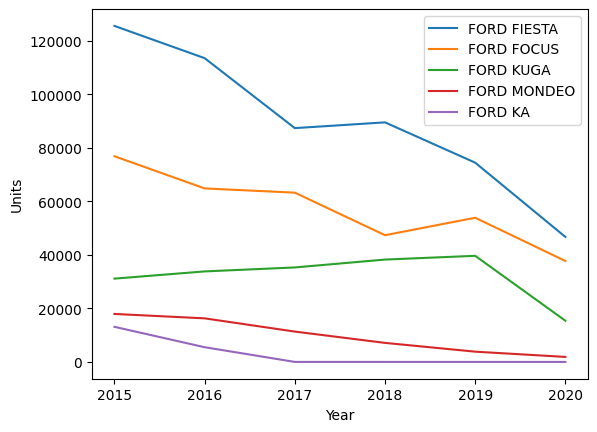

In [63]:
df = df_sales_melt[(df_sales_melt['Year']>= '2015') & (df_sales_melt['Maker']== 'FORD')].groupby(['Maker', 'Genmodel','Year'], as_index=False)['Units'].sum()

df_top_ford= df[(df['Units'] > 1000) & (df['Year'] == '2015')].sort_values('Units', ascending=False).head(5)

print(df_top_ford[['Genmodel', 'Units']])

axes2= plt.axes()
for i in range(0, len(df_top_2020)):
    axes2= df[df['Genmodel'] == df_top_ford.iloc[i,1]].plot(ax=axes2,  xlabel='Year', ylabel='Units', x='Year')

plt.legend(df_top_ford.iloc[:,1])